### Importing necessary libraries

In [159]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('train.csv')

In [160]:
import unicodedata
import nltk
import string
from tqdm import tqdm
from time import time

### Basic visualization

In [161]:
df.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [162]:
total_comments = df.shape[0]
print("Number of rows in the dataset:", total_comments)

Number of rows in the dataset: 159571


A comment is deemed to be safe or non-toxic if it has a '0' entry under every toxicity level class.

### Number of safe and toxic comments

In [163]:
# To find the number of safe (non-toxic) comments:
df_numeric = df[['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']]
df_arr = np.array(df_numeric)

num_com = [None]*7
# Number of comments having a certain number of labels
for i in range(7):
    num_com[i] = list(df_arr.sum(axis=1)).count(i)
    print("Number of comments that have {} labels: {}".format(i, num_com[i]))

Number of comments that have 0 labels: 143346
Number of comments that have 1 labels: 6360
Number of comments that have 2 labels: 3480
Number of comments that have 3 labels: 4209
Number of comments that have 4 labels: 1760
Number of comments that have 5 labels: 385
Number of comments that have 6 labels: 31


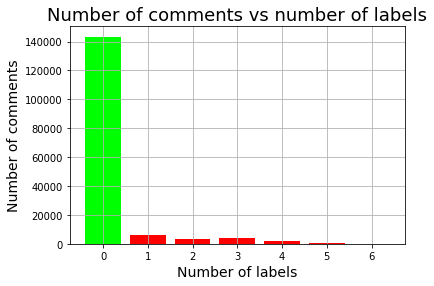

Percentage of safe comments = 89.83 %


In [164]:
plt.bar(range(7), height=num_com, color=['lime', 'red', 'red', 'red','red', 'red', 'red'])
plt.title("Number of comments vs number of labels", size=18)
plt.xlabel("Number of labels", size=14)
plt.ylabel("Number of comments", size=14)
plt.grid()
plt.show()

print("Percentage of safe comments =", round((num_com[0]/total_comments)*100, 2), "%")

The green bar shows the number of safe comments. The red bars show the number of toxic comments. We see that the dataset is highly skewed, most of the comments in the dataset are safe.

### Analyzing the length of the comments

In [165]:
comments = df['comment_text']
labels = np.array(df[['toxic', 'severe_toxic' , 'obscene' , 'threat' , 'insult' , 'identity_hate']])
x = [len(comments[i]) for i in range(comments.shape[0])]

In [166]:
max_len = max(x)
min_len = min(x)
print("Length of the longest comment =", max_len)
print("Length of the shortest comment =", min_len)
print('Average length of a comment: {:.3f}'.format(sum(x)/len(x)) )

Length of the longest comment = 5000
Length of the shortest comment = 6
Average length of a comment: 394.073


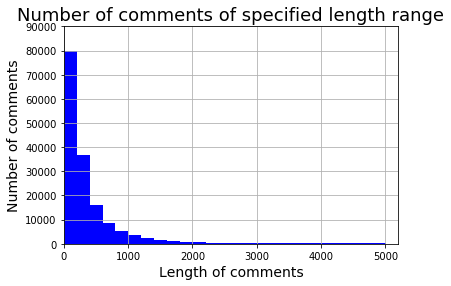

In [167]:
bins = [1,200,400,600,800,1000,1200]
bins = list(range(min_len, max_len + 200, 200))
plt.hist(x, bins=bins, color='blue')
plt.xlabel('Length of comments', size=14)
plt.ylabel('Number of comments',size=14)      
plt.title('Number of comments of specified length range', size=18)
plt.axis([0, max_len + 200, 0, 90000])

plt.grid(True)
plt.show()

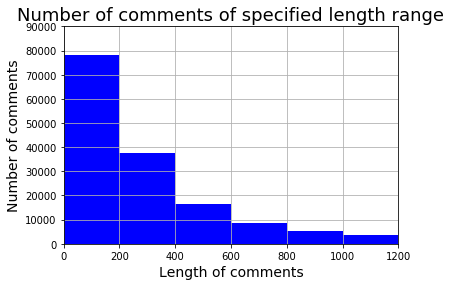

In [168]:
bins = [1,200,400,600,800,1000,1200]
plt.hist(x, bins=bins, color='blue')
plt.xlabel('Length of comments', size=14)
plt.ylabel('Number of comments',size=14)      
plt.title('Number of comments of specified length range', size=18)
plt.axis([0, 1200, 0, 90000])

plt.grid(True)
plt.show()

#### Category-wise length analysis(only unsafe)

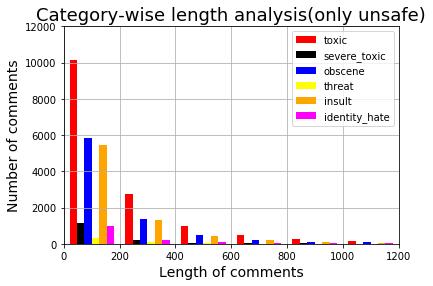

In [169]:
y = np.zeros(labels.shape)
for ix in range(comments.shape[0]):
    l = len(comments[ix])
    if labels[ix][0] :
        y[ix][0] = l
    if labels[ix][1] :
        y[ix][1] = l
    if labels[ix][2] :
        y[ix][2] = l
    if labels[ix][3] :
        y[ix][3] = l
    if labels[ix][4] :
        y[ix][4] = l
    if labels[ix][5] :
        y[ix][5] = l

labelsplt = ['toxic','severe_toxic','obscene','threat','insult','identity_hate']
color = ['red','black','blue','yellow','orange','magenta']        
plt.hist(y,bins = bins,label = labelsplt,color = color)
plt.axis([0, 1200, 0, 12000])
plt.xlabel('Length of comments', size=14)
plt.ylabel('Number of comments', size=14)
plt.title('Category-wise length analysis(only unsafe)', size=18)
plt.legend()
plt.grid(True)
plt.show()

#### Category-wise length analysis(including safe)

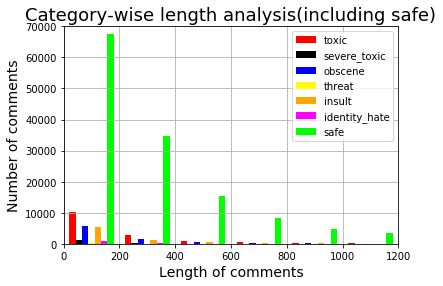

In [170]:
y = np.zeros((labels.shape[0], labels.shape[1]+1))
for ix in range(comments.shape[0]):
    l = len(comments[ix])
    if labels[ix][0] :
        y[ix][0] = l
    if labels[ix][1] :
        y[ix][1] = l
    if labels[ix][2] :
        y[ix][2] = l
    if labels[ix][3] :
        y[ix][3] = l
    if labels[ix][4] :
        y[ix][4] = l
    if labels[ix][5] :
        y[ix][5] = l
    if sum(labels[ix])==0:
        y[ix][6] = l

labelsplt = ['toxic','severe_toxic','obscene','threat','insult','identity_hate', 'safe']
color = ['red','black','blue','yellow','orange','magenta', 'lime']        
plt.hist(y,bins = bins,label = labelsplt,color = color)
plt.axis([0, 1200, 0, 70000])
plt.xlabel('Length of comments', size=14)
plt.ylabel('Number of comments', size=14)
plt.title('Category-wise length analysis(including safe)', size=18)
plt.legend()
plt.grid(True)
plt.show()

In [171]:
count = 0
cut_off = 400
label_count = np.zeros(7)
total_label_count = np.zeros(7)

for i in range(len(x)):
    comment_length = len(comments[i])
    flag = False
    if comment_length <= cut_off:
        count += 1
        for j in range(6):
            if labels[i, j] == 1:
                label_count[j] += 1
                flag = True
        if not flag:
            label_count[6] += 1
                
for i in range(len(x)):
    flag = False
    for j in range(6):
        if labels[i, j] == 1:
            total_label_count[j] += 1
            flag = True
    if not flag:
        total_label_count[6] += 1

In [172]:
print("Number     of comments whose length is at most {} = {}".format(cut_off, count))
print("Percentage of comments whose length is at most {} = {}".format(cut_off, count*100/len(x)))
print()

print("Percentage of comments from each class whose length is at most {}:".format(cut_off))
for j in range(7):
    print(labelsplt[j], label_count[j]*100/total_label_count[j], sep=' : ')

Number     of comments whose length is at most 400 = 115910
Percentage of comments whose length is at most 400 = 72.63851201032769

Percentage of comments from each class whose length is at most 400:
toxic : 84.17026284817575
severe_toxic : 85.07836990595611
obscene : 85.57225707184283
threat : 86.40167364016736
insult : 86.09876856671322
identity_hate : 84.05693950177935
safe : 71.44322129672261


#### Observations

* In every bin, we can see that the number of safe comments is the highest by a very large margin
* The average length of the comments is 394.073 characters.
* Using only comments whose length is atmost 400 characters includes 72.64% of the original data(115910 comments) and also helps us to avoid some very long comments, which will add a large number of words into our training data matrix, making the training of models on the data slow, and the accuracy of the prediction low.
* We can also see that the percentage of comments from each class is greater than 80%.


In [173]:
df['length'] = x
df_new = df.loc[df['length'] <= cut_off]
df_new.shape

(115910, 9)

### Preprocessing Steps

#### Converting to Lowercase and Removing Punctuation

In [174]:
from nltk.tokenize import word_tokenize

def my_word_tokenize(doc):
    new_doc = ""
    characters_to_remove = string.punctuation.replace("'", "") + "\n"
    new_doc = ''.join([ch if ch not in characters_to_remove else " " for ch in doc])
    return new_doc.split()

def basic_preprocess(doc):
    '''
    Input: doc (A comment, which is string)
    Output: List of words in the preprocessed document
    Basic preprocessing includes:
    a) converting to lowercase
    b) removing newline characters
    c) removing all punctuation
    d) normalizing to NFKC form
    '''
    
    # Normalization and conversiom to lowercase
    doc = unicodedata.normalize('NFKC', doc).lower()

    # A list of all the words in the document after removing punctuation.
    tokens = my_word_tokenize(doc)
    return tokens

def basic_preprocess_1(doc):
    '''
    Input: doc (A comment, which is string)
    Output: List of words in the preprocessed document
    Basic preprocessing includes:
    a) converting to lowercase
    b) removing newline characters
    c) removing all punctuation
    d) normalizing to NFKC form
    '''
    
    # Normalization and conversiom to lowercase
    doc = unicodedata.normalize('NFKC', doc).lower()
    doc = doc.replace('_', ' ')
    
    # A list of all the words in the document after removing punctuation.
    tokens = word_tokenize(doc)
    # Maps all punctuation marks to 'None'
    table = str.maketrans('', '', string.punctuation)
    # Removes the punctuation marks from each word, if present.
    stripped = [w.translate(table) for w in tokens]
    stripped = [w for w in stripped if w!='']
    return stripped

#### Lemmatization

In [175]:
from nltk.stem import WordNetLemmatizer
from nltk.corpus import  wordnet

def get_wordnet_pos(treebank_tag):
    '''
    This function is used to convert the Part of Speech tags returned by nltk.pos_tag
    function to the wordnet POS tags.
    '''
    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN
        # Instead of returning None, I am returning the noun tag, because, by default
        # the WordNetLemmatizer assumes that the POS tag is noun.
        
def lemmatize(doc_words):
    '''
    Input: doc(A comment)
    Output: A list of words in the document,after lemmatization
    '''
    # Creating Part-of-Speech tags for the words
    pos_tags = nltk.pos_tag(doc_words)
    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    lem_words = [lemmatizer.lemmatize(word, pos = get_wordnet_pos(tag)) for word, tag in pos_tags]
    return lem_words

#### Removing Stopwords

In [176]:
# Removal of stopwords
from nltk.corpus import stopwords
def remove_stopwords(doc_words):
    '''
    Input: doc(a comment)
    Output: List of words in that document, after removing stop words.
    '''
    words_to_remove = set(stopwords.words('english'))
    words = [word for word in doc_words if word not in words_to_remove]
    return words

#### Preprocessing

In [177]:
def preprocess(doc):
    '''
    Input: doc (A comment)
    Output: List of words (after preprocessing)
    '''
    preprocessed_doc = basic_preprocess(doc)
    lemmatized_doc = lemmatize(preprocessed_doc)
    final_preprocessed_doc = remove_stopwords(lemmatized_doc)
    return final_preprocessed_doc

def preprocess_1(doc):
    '''
    Input: doc (A comment)
    Output: List of words (after preprocessing)
    '''
    preprocessed_doc = basic_preprocess_1(doc)
    lemmatized_doc = lemmatize(preprocessed_doc)
    final_preprocessed_doc = remove_stopwords(lemmatized_doc)
    return final_preprocessed_doc

### Preprocessing the Comments

I want to preprocess both the original dataframe and the trimmed dataframe.

In [186]:
start = time()
a = df_new.copy()
a['processed_comments']= a.apply(lambda row : preprocess_1(row['comment_text']), axis = 1)
end = time()
print("Time taken (in seconds) for preprocessing:")
print(end - start)

Time taken (in seconds) for preprocessing:
222.64897871017456


In [ ]:
start = time()
b = df.copy()
b['processed_comments']= b.apply(lambda row : preprocess_1(row['comment_text']), axis = 1)
end = time()
print("Time taken (in seconds) for preprocessing:")
print(end - start)

In [187]:
a.to_csv('processed_trainset_trimmed.csv')
b.to_csv('processed_trainset.csv')

The comment gets converted into a list of words after preprocessing, when we store the new dataframe as a csv file, the list is stored as string. In order to use it properly as a list, the following method will be helpful:

```
from ast import literal_eval
string_list = "[12, 45]"
new_list = literal_eval(string_list)
```
**new_list** can now be used as a normal list.

In [189]:
a.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,length,processed_comments
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,264,"[explanation, edits, make, username, hardcore,..."
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,112,"[daww, match, background, colour, seemingly, s..."
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,233,"[hey, man, really, try, edit, war, guy, consta..."
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,67,"[sir, hero, chance, remember, page]"
5,00025465d4725e87,"""\n\nCongratulations from me as well, use the ...",0,0,0,0,0,0,65,"[congratulation, well, use, tool, well, ·, talk]"
